In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/50_Startups.csv'  # Update path based on upload
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())
print(data.info())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify independent variables (features) and dependent variable (target)
X = data.iloc[:, :-1]  # All columns except the last one (Profit)
y = data.iloc[:, -1]   # The last column (Profit)

# Handle categorical variables (if a "State" column exists)
if 'State' in X.columns:
    ct = ColumnTransformer([('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
    X = ct.fit_transform(X)
    X = pd.DataFrame(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Calculate and display correlations
correlation_marketing_profit = data['Profit'].corr(data['Marketing Spend'])
correlation_rd_profit = data['Profit'].corr(data['R&D Spend'])

# Correlations for states
correlation_state_new_york_profit = data['Profit'].corr(data['State_New York'])
correlation_state_california_profit = data['Profit'].corr(data['State_California'])
correlation_state_florida_profit = data['Profit'].corr(data['State_Florida']) # Calculate for Florida

# Print the correlation results
print("\nCorrelations:")
print(f"Correlation between Profit and Marketing Spend: {correlation_marketing_profit:.2f}")
print(f"Correlation between Profit and R&D Spend: {correlation_rd_profit:.2f}")
print(f"Correlation between Profit and State (New York): {correlation_state_new_york_profit:.2f}")
print(f"Correlation between Profit and State (California): {correlation_state_california_profit:.2f}")
print(f"Correlation between Profit and State (Florida): {correlation_state_florida_profit:.2f}") # Print for Florida


Correlations:
Correlation between Profit and Marketing Spend: 0.75
Correlation between Profit and R&D Spend: 0.97
Correlation between Profit and State (New York): 0.03
Correlation between Profit and State (California): -0.15
Correlation between Profit and State (Florida): 0.12


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Prepare the data for Simple Linear Regression
X_rd = df['R&D Spend'].values.reshape(-1, 1)  # Independent variable (R&D Spend)
y = df['Profit'].values  # Dependent variable (Profit)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rd, y, test_size=0.2, random_state=42)

# Create the model and train it
model_rd = LinearRegression()
model_rd.fit(X_train, y_train)

# Predictions
y_pred_rd = model_rd.predict(X_test)

# Calculate R-squared and Mean Squared Error
r_squared_rd = model_rd.score(X_test, y_test)
mse_rd = mean_squared_error(y_test, y_pred_rd)

# Print the results
print("Simple Linear Regression Results for Profit and R&D Spend:")
print(f"R-squared for R&D Spend and Profit: {r_squared_rd}")
print(f"Mean Squared Error: {mse_rd}")


Simple Linear Regression Results for Profit and R&D Spend:
R-squared for R&D Spend and Profit: 0.9265108109341951
Mean Squared Error: 59510962.80787997


In [ ]:
# Prepare the data for Simple Linear Regression
X_marketing = df['Marketing Spend'].values.reshape(-1, 1)  # Independent variable (Marketing Spend)

# Split the data into training and testing sets
X_train_marketing, X_test_marketing, y_train_marketing, y_test_marketing = train_test_split(X_marketing, y, test_size=0.2, random_state=42)

# Create the model and train it
model_marketing = LinearRegression()
model_marketing.fit(X_train_marketing, y_train_marketing)

# Predictions
y_pred_marketing = model_marketing.predict(X_test_marketing)

# Calculate R-squared and Mean Squared Error
r_squared_marketing = model_marketing.score(X_test_marketing, y_test_marketing)
mse_marketing = mean_squared_error(y_test_marketing, y_pred_marketing)

# Print the results
print("Simple Linear Regression Results for Profit and Marketing Spend:")
print(f"R-squared for Marketing Spend and Profit: {r_squared_marketing}")
print(f"Mean Squared Error: {mse_marketing}")


Simple Linear Regression Results for Profit and Marketing Spend:
R-squared for Marketing Spend and Profit: -0.11205578997827947
Mean Squared Error: 900533964.2328259


In [ ]:
# Prepare the data for Multiple Linear Regression
X_multiple = df[['R&D Spend', 'Marketing Spend']].values  # Independent variables (R&D Spend, Marketing Spend)

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create the model and train it
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

# Predictions
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Calculate R-squared and Mean Squared Error
r_squared_multiple = model_multiple.score(X_test_multiple, y_test_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)

# Print the results
print("Multiple Linear Regression Results for Profit, R&D Spend, and Marketing Spend:")
print(f"R-squared for Multiple Linear Regression: {r_squared_multiple}")
print(f"Mean Squared Error: {mse_multiple}")


Multiple Linear Regression Results for Profit, R&D Spend, and Marketing Spend:
R-squared for Multiple Linear Regression: 0.9168381183550245
Mean Squared Error: 67343832.58979625


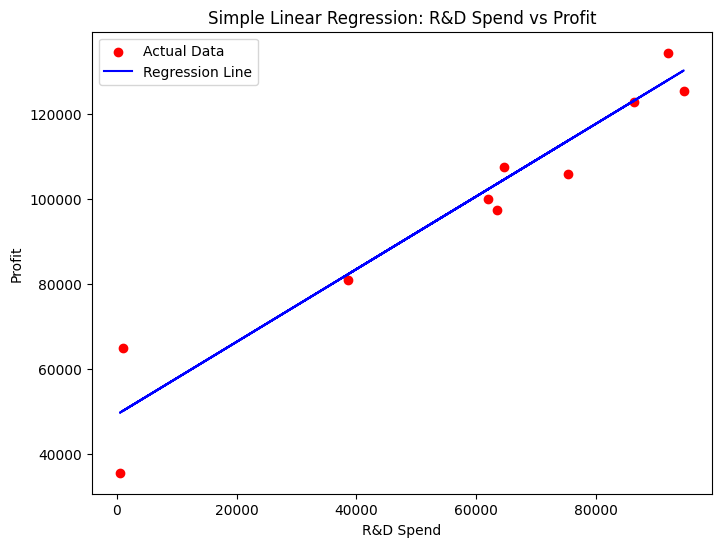

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Simple Linear Regression for Profit and R&D Spend
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Actual Data')  # Actual data points
plt.plot(X_test, y_pred_rd, color='blue', label='Regression Line')  # Regression line

plt.title('Simple Linear Regression: R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()


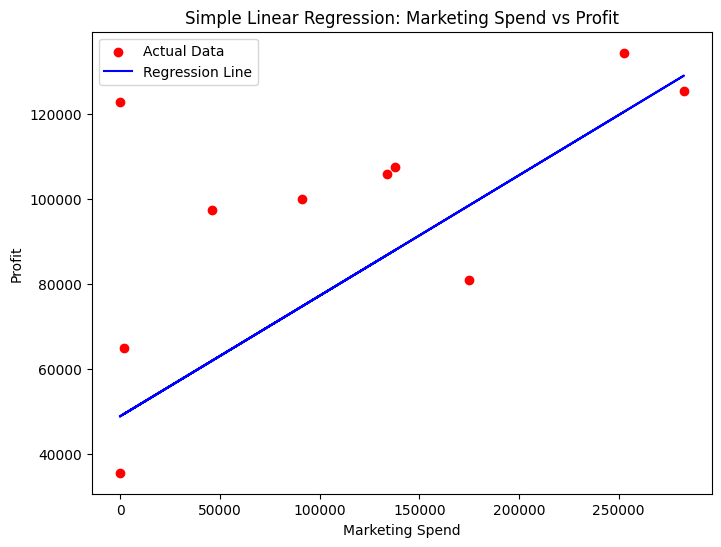

In [ ]:
# Plotting Simple Linear Regression for Profit and Marketing Spend
plt.figure(figsize=(8, 6))
plt.scatter(X_test_marketing, y_test_marketing, color='red', label='Actual Data')  # Actual data points
plt.plot(X_test_marketing, y_pred_marketing, color='blue', label='Regression Line')  # Regression line

plt.title('Simple Linear Regression: Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()


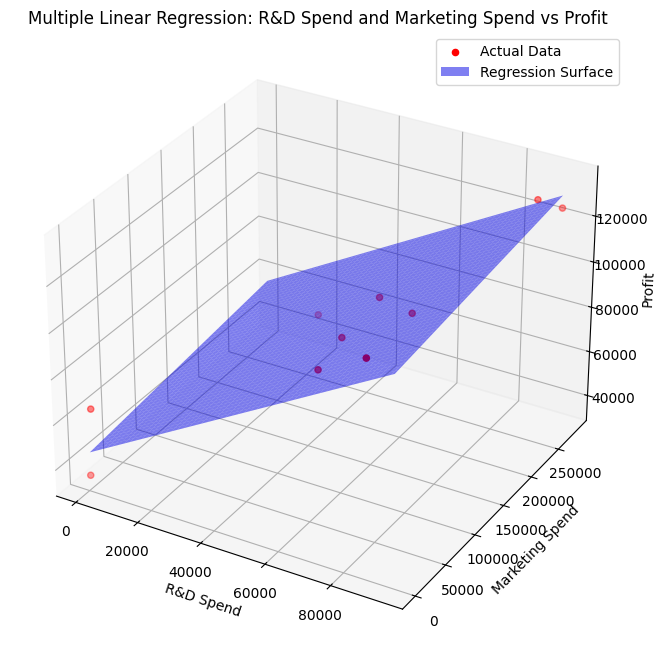

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for plotting (R&D Spend and Marketing Spend)
X1 = X_test_multiple[:, 0]  # R&D Spend
X2 = X_test_multiple[:, 1]  # Marketing Spend
Y = y_test_multiple  # Profit

# Create a meshgrid for plotting
x1_range = np.linspace(X1.min(), X1.max(), 100)
x2_range = np.linspace(X2.min(), X2.max(), 100)
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
Y_range = model_multiple.predict(np.array([X1_range.ravel(), X2_range.ravel()]).T).reshape(X1_range.shape)

# Plotting the 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='red', label='Actual Data')  # Actual data points
ax.plot_surface(X1_range, X2_range, Y_range, color='blue', alpha=0.5, label='Regression Surface')  # Regression surface

ax.set_title('Multiple Linear Regression: R&D Spend and Marketing Spend vs Profit')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

plt.legend()
plt.show()
